# Data Visualization Part 1

In [100]:
# Adding the neccecary imports to our code
import numpy as np
import matplotlib.pyplot as plt
import pydot # conda install pydot

In [101]:
#type of data:
url_Les_Miserables_network  = '../data/LesMiserables.dot'
url_Rome_graph  = '../data/rome.dot'
url_Jazz_Network  = '../data/JazzNetwork.dot'
url_Small_Directed_Network  = '../data/noname.dot'
url_Pro_League_Network  = '../data/LeagueNetwork.dot'
url_Argumentation_network  = '../data/devonshiredebate_withclusters.dot'
url_Political_blogosphere_network  = '../data/polblogs.dot'

In [102]:
# classes
class Vertex:
    def __init__(self, id, x, y,neighbors = []): 
        self.id = id
        self.x = x
        self.y = y
        self.neighbors = neighbors
    def add_neighbor(self,neighbor):
        self.neighbors.append(neighbor)
class Edge:
    def __init__(self, start, end):
        self.start = start
        self.end = end

class Graph:
    def __init__(self):
        self.vertices = []
        self.edges = []

    def add_vertex(self, vertex):
        self.vertices.append(vertex)

    def add_edge(self, edge):
        self.edges.append(edge)
        
    def get_vertex(self, id):
        for vertex in self.vertices:
            if vertex.id == id:
                return vertex
        return None
    def visualize_graph(self,custom_figsize,radius,randomization): # O(V + V + E) = O(2V + E) = O(V + E)
        
        self.place_vertices_in_circle(radius,randomization) # O(V)
        fig, ax = plt.subplots(figsize=(custom_figsize, custom_figsize))  # Adjust width and height as needed
        # Plot Vertices
        for vertex in self.vertices: # O(V)
            ax.scatter(vertex.x, vertex.y, color='blue', zorder=2, s=200, edgecolors='black')
            ax.text(vertex.x, vertex.y, str(vertex.id), fontsize=8, ha='center', va='center', zorder=3, color='white')
        # Plot edges
        for edge in self.edges: #O(E)
            start = edge.start
            end = edge.end
            ax.plot([start.x, end.x], [start.y, end.y], color='gray', zorder=1, linewidth=0.5)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title('Graph Visualization')
        ax.grid(True)
        ax.set_aspect('equal', adjustable='box')
        plt.show()
    def place_vertices_in_circle(self,radius,randomization): # O(V)
        num_vertices = len(self.vertices)
        radius = radius  # Radius of the circle
        center_x = 0
        center_y = 0
        angle_increment = 4 * np.pi / num_vertices
    
        # Place vertices in a bit of randomized circle 
        for i, vertex in enumerate(self.vertices): # O(V)
            angle = i * angle_increment
            vertex.x = center_x + radius * np.cos(angle) + np.random.uniform(-randomization, randomization)
            vertex.y = center_y + radius * np.sin(angle) + np.random.uniform(-randomization, randomization)

In [107]:
def create_custom_graph(G): # O(V) + O(E) + O(V) + O(E) = O(2V + 2E) = O(V + E)
    # Parsing the vertices and edges from the generated graph into lists
    vertices = [n.get_name() for n in G.get_node_list()] # O(V)
    edges = [(edge.get_source(),edge.get_destination(),edge.get_weight()) for edge in G.get_edge_list()] # O(E)
    graph = Graph()
    for vertex in vertices: # O(V)
        vertex = Vertex(vertex, 0, 0)  # Initialize the vertex with ID and default coordinates
        graph.add_vertex(vertex)
    for edge in edges: # O(E)
        source_vertex = graph.get_vertex(edge[0])
        neighbor_vertex = graph.get_vertex(edge[1])
        if source_vertex is None:
            source_vertex = Vertex(edge[0], 0, 0)
        if neighbor_vertex is None:
            neighbor_vertex = Vertex(edge[1], 0, 0)
        source_vertex.add_neighbor(neighbor_vertex)
        graph.add_edge(Edge(source_vertex, neighbor_vertex))
    return graph

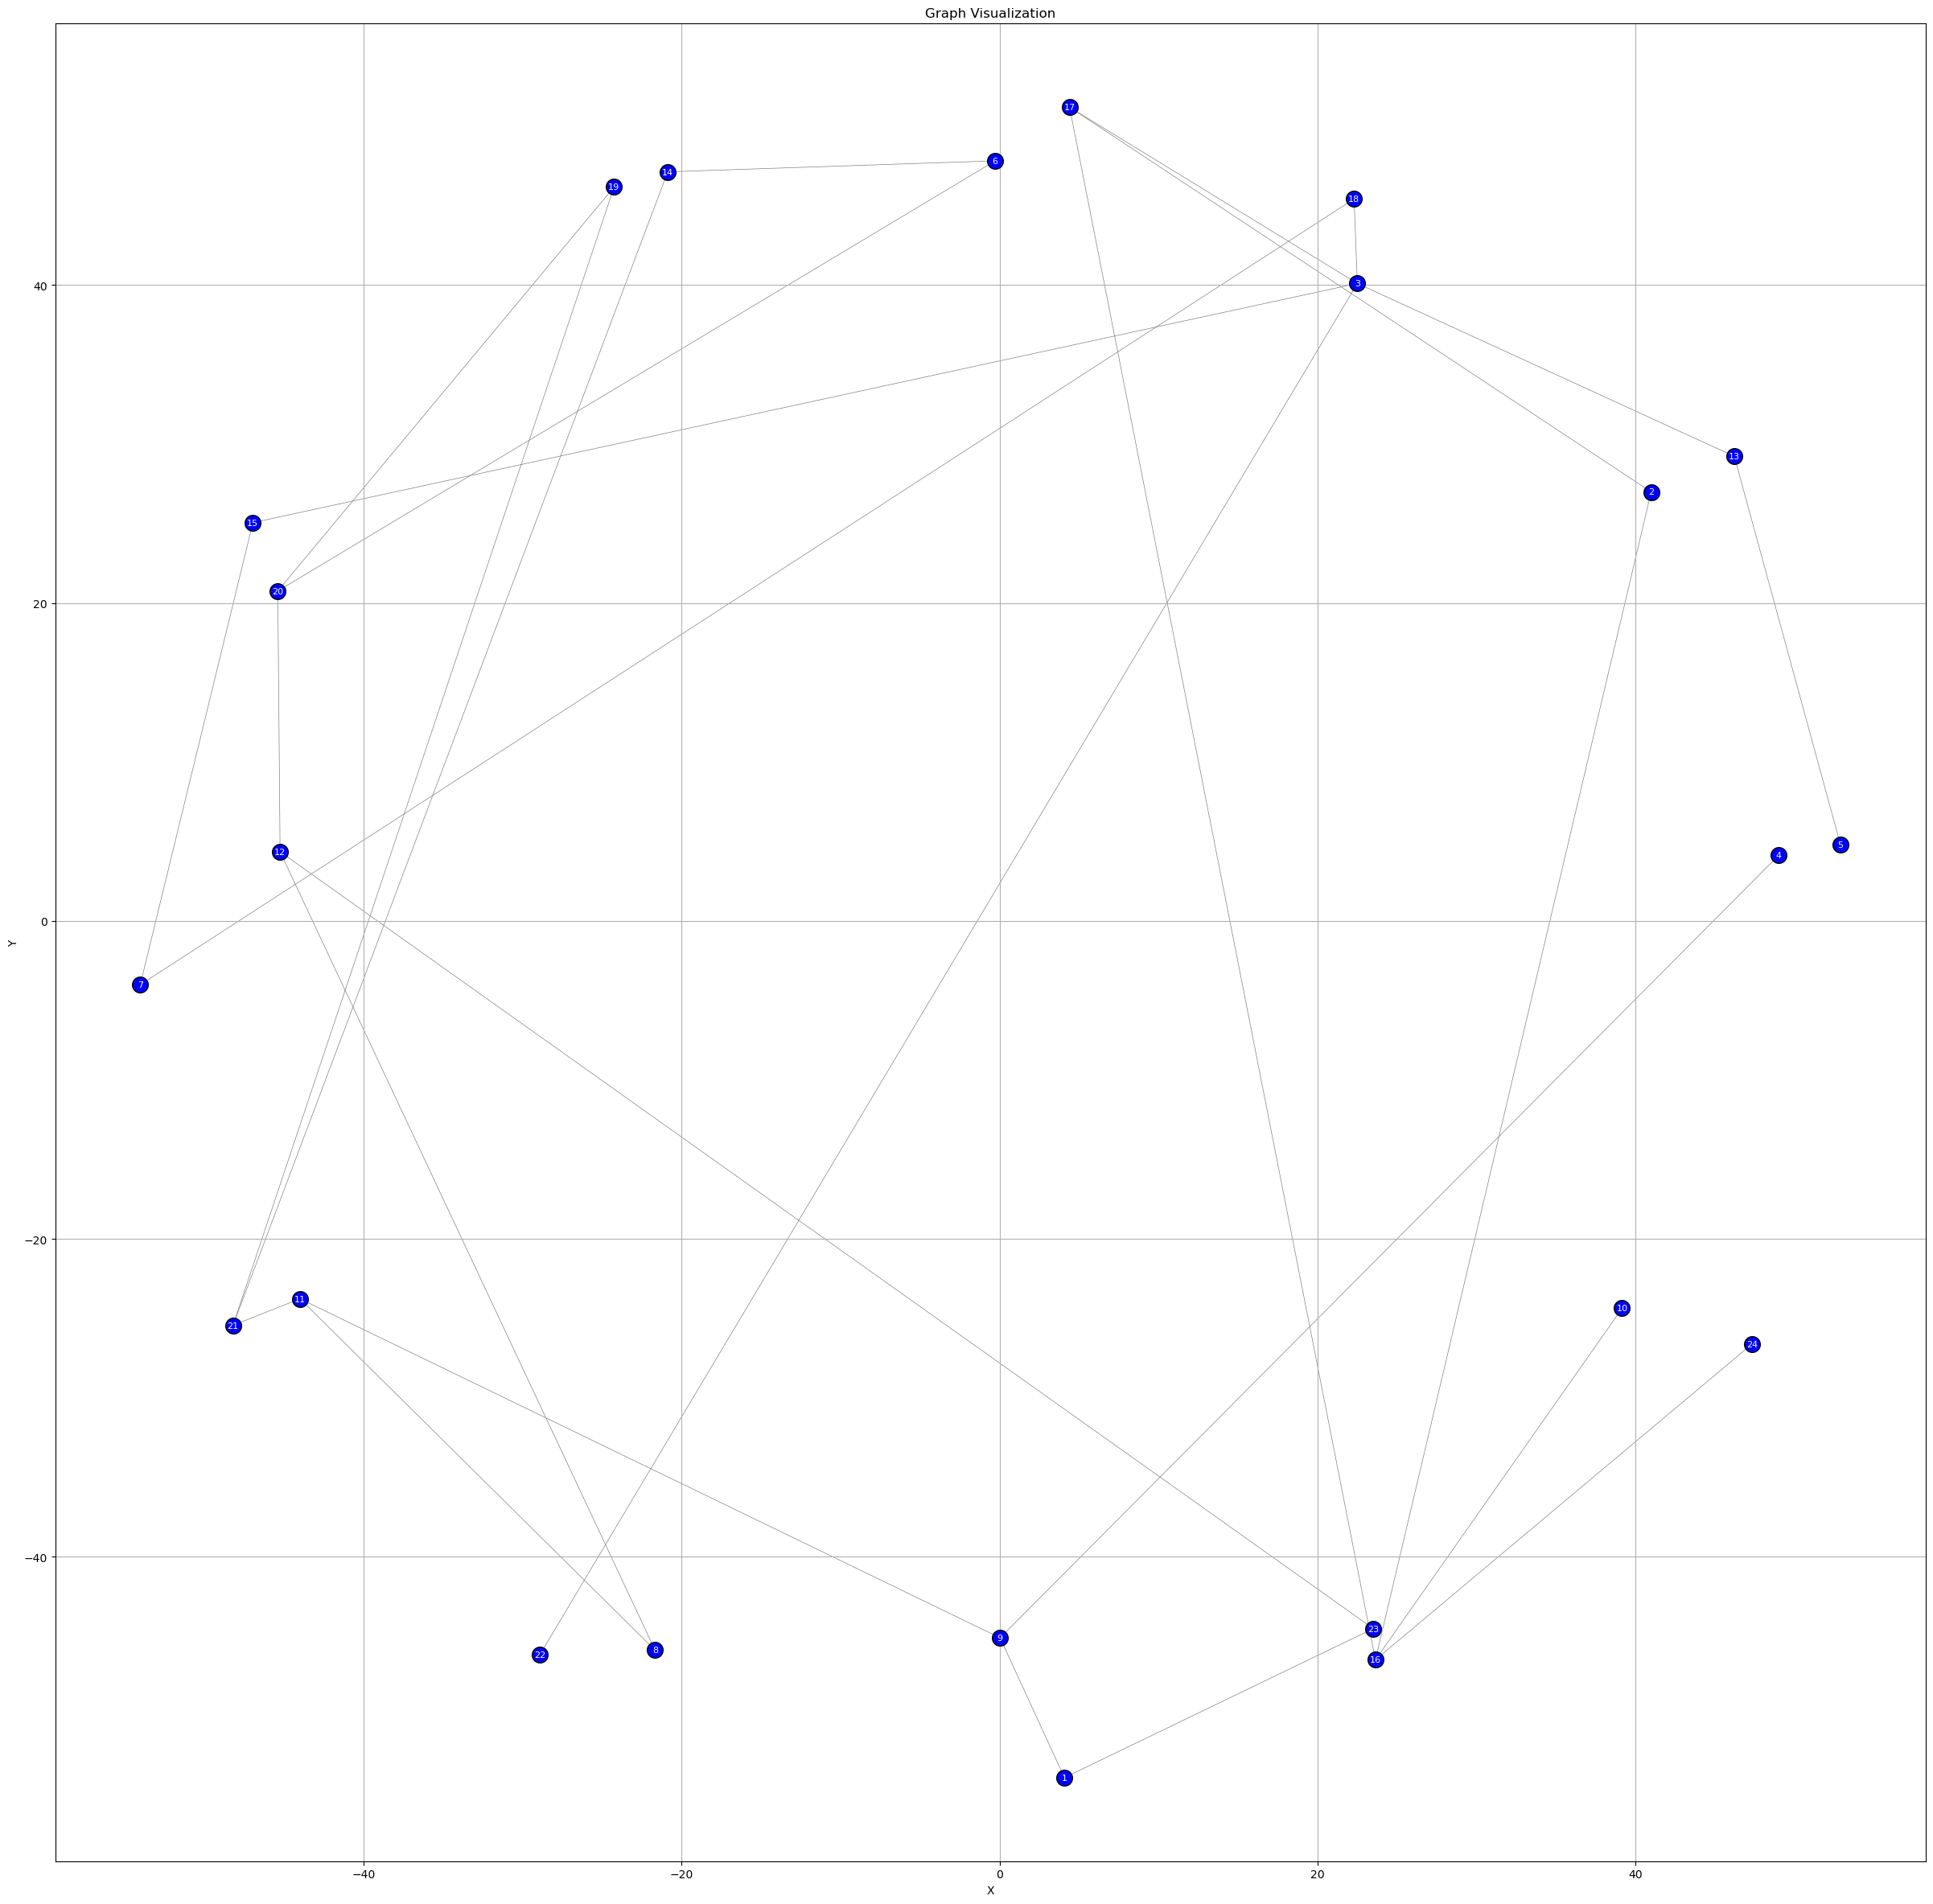

In [108]:

# Parsing the data from the dot file:
G = pydot.graph_from_dot_file(url_Small_Directed_Network)[0] 
#Convering the graph into our custom graph
graph = create_custom_graph(G) #O(V) + O(E) = O(V + E)
# Visualize the graph
graph.visualize_graph(30,50,5) #O(V + E)


# Complexity of our layout algorithm:
First, we converted the dot file into a graph representation. In order to work effectively with this graph, we designed a custom structure that is more sutable for our requirements using the function "create_custom_graph" that takes the generated graph and convert it into our graph.
Subsequently, our algorithm proceeds as follows:
We iterate through all vertices of the graph and plot them in a semi-circular format. This process has a complexity of O(V).
Next, we scan through the edges of the graph. For each edge, we draw a line between the corresponding pair of vertices. This step has a complexity of O(E) since it involves iterating over all edges.

Therefore, the total complexity of our layout algorithm is O(V + E), where V represents the number of vertices and E represents the number of edges in the graph.


#  Pro's and con's of our layout: 
TO BE FILLED

# Bonus ( better algorithm + its implementaion + comparison between the two layout + Complexity of the new algorithm)